<a href="https://colab.research.google.com/github/oskarkon/dw_matrix_car/blob/master/dzie%C5%844.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import os
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
%tensorflow_version 1.x
#%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import color,exposure
from sklearn.metrics import accuracy_score

TensorFlow is already loaded. Please restart the runtime to change versions.


In [119]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/data/dw_matrix_road_sign/data'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/data/dw_matrix_road_sign/data


In [0]:
train=pd.read_pickle('train.p')
test=pd.read_pickle('test.p')
X_train, y_train =train['features'], train['labels']
X_test,y_test=test['features'],test['labels']

In [0]:
if y_train.ndim ==1: y_train=to_categorical(y_train)
if y_test.ndim ==1: y_test=to_categorical(y_test)

In [0]:
input_shape=X_train.shape[1:]
num_classes = y_train.shape[1]

In [123]:
model=Sequential([
   Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=input_shape),               

    Flatten(),

    Dense(num_classes, activation='softmax'),
])
#model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 8.8162 - accuracy: 0.7774


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=input_shape),               

    Flatten(),

    Dense(num_classes, activation='softmax'),
    ])
def train_model(model, X_train,y_train,params_fit={}):
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

    logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
    
    
    model.fit(
        X_train,
        y_train,
        batch_size=params_fit.get('batch_size',128),
        epochs=params_fit.get('epochs',5),
        verbose=params_fit.get('verbose',1),
        validation_data=params_fit.get('validation_data',(X_train,y_train)),
        callbacks=[tensorboard_callback]
        
        
    )
    return model

In [125]:
model=get_cnn_v1(input_shape,num_classes)
model_trained=train_model(model, X_train,y_train)

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 41.6402 - accuracy: 0.7638 - val_loss: 0.1893 - val_accuracy: 0.9559
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1917 - accuracy: 0.9563 - val_loss: 0.1051 - val_accuracy: 0.9743
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1424 - accuracy: 0.9688 - val_loss: 0.0992 - val_accuracy: 0.9771
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1237 - accuracy: 0.9717 - val_loss: 0.0775 - val_accuracy: 0.9869
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0818 - accuracy: 0.9810 - val_loss: 0.0657 - val_accuracy: 0.9843


In [126]:
y_pred_prob=model_trained.predict(X_test)
y_pred_prob

array([[6.2087985e-19, 1.8248980e-15, 1.3022016e-16, ..., 5.6968605e-12,
        9.9999976e-01, 2.1692752e-07],
       [5.0659449e-21, 2.9302618e-13, 2.5672122e-14, ..., 1.3717893e-09,
        9.9708647e-01, 1.7441627e-08],
       [8.0735428e-22, 4.6661563e-16, 3.1611720e-16, ..., 8.8229681e-11,
        9.9958771e-01, 2.3192359e-11],
       ...,
       [0.0000000e+00, 3.4713629e-14, 8.3285966e-20, ..., 3.4590869e-23,
        9.9272225e-37, 2.5265279e-29],
       [2.0246348e-31, 7.9989192e-15, 1.1084506e-19, ..., 8.8020903e-25,
        4.7602752e-30, 3.3967355e-31],
       [4.8637339e-37, 1.2542851e-16, 1.2727354e-16, ..., 4.1513168e-19,
        1.3200997e-28, 1.6818568e-28]], dtype=float32)

In [127]:
y_pred_prob[400]

array([0.01101952, 0.02622045, 0.03264389, 0.01466214, 0.01291372,
       0.03544577, 0.0139947 , 0.02483243, 0.04478982, 0.00770912,
       0.04485336, 0.03619478, 0.00795722, 0.00632201, 0.00615112,
       0.00265927, 0.01123065, 0.01263244, 0.00676314, 0.0303416 ,
       0.0171532 , 0.04409334, 0.04320269, 0.08615462, 0.01913168,
       0.01888474, 0.00704479, 0.02204769, 0.01164212, 0.01360074,
       0.03549638, 0.20139872, 0.00061704, 0.02157016, 0.01613018,
       0.00539961, 0.00512371, 0.00276696, 0.01026656, 0.01070119,
       0.00838309, 0.00465316, 0.0052005 ], dtype=float32)

In [128]:
np.argmax(y_pred_prob[400])

31

<BarContainer object of 43 artists>

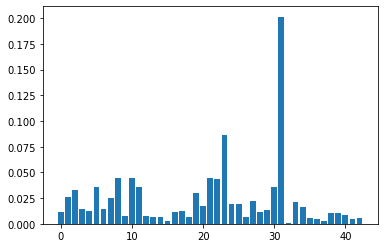

In [129]:
plt.bar(range(43),y_pred_prob[400])

In [0]:
df=pd.read_csv('signnames.csv')
labeles_dict=df.to_dict()['b']

In [131]:
labeles_dict[np.argmax(y_pred_prob[100])]

'End of no passing'

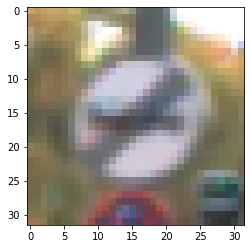

In [132]:
plt.imshow(X_test[100])  

In [0]:
df=pd.read_csv('signnames.csv')
labeles_dict=df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm=np.argmax(y_test,axis=1)
  y_pred_prob=model_trained.predict(X_test)
  y_pred=np.argmax(y_pred_prob,axis=1)

  return scoring(y_test_norm,y_pred)

In [135]:
 y_test_norm=np.argmax(y_test, axis=1)
 y_pred_prob=model_trained.predict(X_test)
 y_pred=np.argmax(y_pred_prob,axis=1)
 y_test_norm

array([41, 41, 41, ..., 25, 25, 25])

In [136]:
predict(model_trained, X_test, y_test)

0.9843386304204144

In [0]:
def train_and_predict(model):
  model_trained=train_model(model, X_train,y_train)
  return predict(model_trained, X_test, y_test)

In [138]:
def get_cnn_v2(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape), 
    MaxPool2D(),   
    Dropout(0.3),          
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
    ])

train_and_predict(get_cnn_v2(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 4.9855 - accuracy: 0.4114 - val_loss: 0.8905 - val_accuracy: 0.7475
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.8634 - accuracy: 0.7460 - val_loss: 0.4042 - val_accuracy: 0.8870
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4738 - accuracy: 0.8598 - val_loss: 0.2179 - val_accuracy: 0.9461
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3086 - accuracy: 0.9120 - val_loss: 0.1188 - val_accuracy: 0.9657
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2104 - accuracy: 0.9393 - val_loss: 0.0630 - val_accuracy: 0.9865


0.9864938647662289

In [139]:
def get_cnn_v3(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape), 
    Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),   
    Dropout(0.3),       
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),  
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),  


    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
    ])

train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 1.6114 - accuracy: 0.6374 - val_loss: 0.1407 - val_accuracy: 0.9699
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2638 - accuracy: 0.9235 - val_loss: 0.0558 - val_accuracy: 0.9883
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1633 - accuracy: 0.9533 - val_loss: 0.0322 - val_accuracy: 0.9914
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1104 - accuracy: 0.9672 - val_loss: 0.0150 - val_accuracy: 0.9961
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0892 - accuracy: 0.9744 - val_loss: 0.0262 - val_accuracy: 0.9947


0.9947412281962126

In [145]:
def get_cnn_v4(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape), 
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),   
    Dropout(0.3), 

    Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'),  
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),  

    Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'),  
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
    ])

train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 3.0283 - accuracy: 0.2128 - val_loss: 1.2998 - val_accuracy: 0.6310
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.9879 - accuracy: 0.7050 - val_loss: 0.2970 - val_accuracy: 0.9203
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4161 - accuracy: 0.8762 - val_loss: 0.0987 - val_accuracy: 0.9770
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2620 - accuracy: 0.9220 - val_loss: 0.0605 - val_accuracy: 0.9865
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1876 - accuracy: 0.9446 - val_loss: 0.0332 - val_accuracy: 0.9924


0.9923561021868444

In [146]:
def get_cnn_v5(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape), 
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(),   
    Dropout(0.3), 

    Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'),  
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),  

    Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'),  
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
    ])

train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.4352 - accuracy: 0.3084 - val_loss: 1.0133 - val_accuracy: 0.6772
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.8424 - accuracy: 0.7286 - val_loss: 0.2041 - val_accuracy: 0.9382
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4219 - accuracy: 0.8683 - val_loss: 0.0893 - val_accuracy: 0.9745
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2888 - accuracy: 0.9130 - val_loss: 0.0510 - val_accuracy: 0.9864
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2260 - accuracy: 0.9323 - val_loss: 0.0452 - val_accuracy: 0.9865


0.9864938647662289

In [0]:
X_train_gray=color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray=color.rgb2gray(X_test).reshape(-1,32,32,1)

In [166]:
model= get_cnn_v5((32,32,1),num_classes)
model_trained = train_model(model, X_train_gray,y_train,params_fit={})
predict(model_trained, X_test_gray,y_test)





Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.3967 - accuracy: 0.3136 - val_loss: 0.6084 - val_accuracy: 0.7914
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5480 - accuracy: 0.8208 - val_loss: 0.1480 - val_accuracy: 0.9551
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2555 - accuracy: 0.9207 - val_loss: 0.0703 - val_accuracy: 0.9803
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1651 - accuracy: 0.9481 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1298 - accuracy: 0.9597 - val_loss: 0.0290 - val_accuracy: 0.9918


0.9917526365700163

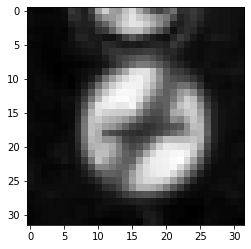

In [150]:
plt.imshowcolor.rgb2gray(X_train[0])(,cmap=plt.get_cmap('gray'))